### timeseries of coccos in the subantarctic

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import ncar_jobqueue
from dask.distributed import Client

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 
import pandas as pd
import cftime
import matplotlib.colors as colors
import utils

In [4]:
case = 'g.e22.GOMIPECOIAF_JRA-1p4-2018.TL319_g17.4p2z.001'
obs_dir = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1/'

###  grab desired variables

In [5]:
variables = ['TEMP','HMXL','coccoC','coccoCaCO3','diatC','spC','diatSi']

In [6]:
time = pd.date_range(start="1958-01-01", end="2019-01-01",freq="M") #will have to adjust for last cycle
time

DatetimeIndex(['1958-01-31', '1958-02-28', '1958-03-31', '1958-04-30',
               '1958-05-31', '1958-06-30', '1958-07-31', '1958-08-31',
               '1958-09-30', '1958-10-31',
               ...
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', length=732, freq='M')

In [7]:
ds_fosi = xr.Dataset()

for var in variables:
    
    print('starting on ', var)
    ################ FOSI
    
    ds_tmp = xr.open_dataset(obs_dir + case + '.pop.h.' + var + '.024501-030512.nc')
    ds_tmp['time'] = time
    ### take care of the 3D vars
    if var=='Fe':
        ds_tmp[var] = (ds_tmp[var].isel(z_t=slice(0,10))).mean(dim='z_t')
    
    if var=='diatC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
        
    if var=='coccoC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
        
    if var=='spC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
        
    if var=='diazC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
                
    if var=='mesozooC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')    

    if var=='microzooC':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')    
                
    if var=='coccoCaCO3':
        ds_tmp[var]= (ds_tmp[var].isel(z_t_150m=slice(0,10))*10.).sum(dim='z_t_150m')
        
    if var=='TEMP':
        ds_tmp[var]= ds_tmp[var].isel(z_t=0) # just grab the top level for temp
    
    ds_fosi = xr.merge([ds_fosi,ds_tmp])

starting on  TEMP
starting on  HMXL
starting on  coccoC
starting on  coccoCaCO3
starting on  diatC
starting on  spC
starting on  diatSi


### get coords and make a ones array for masking

In [8]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lats = ds_grid.TLAT
lons = ds_grid.TLONG
area = ds_grid.TAREA

In [9]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

### Sample the dataset for annual

In [11]:
%%time
ds_fosi_ann = ds_fosi.resample({'time':'A'}).mean(dim='time').compute()

CPU times: user 2min 1s, sys: 11.1 s, total: 2min 12s
Wall time: 2min 28s


In [12]:
ds_fosi_ann.time

<xarray.DataArray 'time' (time: 61)>
array(['1958-12-31T00:00:00.000000000', '1959-12-31T00:00:00.000000000',
       '1960-12-31T00:00:00.000000000', '1961-12-31T00:00:00.000000000',
       '1962-12-31T00:00:00.000000000', '1963-12-31T00:00:00.000000000',
       '1964-12-31T00:00:00.000000000', '1965-12-31T00:00:00.000000000',
       '1966-12-31T00:00:00.000000000', '1967-12-31T00:00:00.000000000',
       '1968-12-31T00:00:00.000000000', '1969-12-31T00:00:00.000000000',
       '1970-12-31T00:00:00.000000000', '1971-12-31T00:00:00.000000000',
       '1972-12-31T00:00:00.000000000', '1973-12-31T00:00:00.000000000',
       '1974-12-31T00:00:00.000000000', '1975-12-31T00:00:00.000000000',
       '1976-12-31T00:00:00.000000000', '1977-12-31T00:00:00.000000000',
       '1978-12-31T00:00:00.000000000', '1979-12-31T00:00:00.000000000',
       '1980-12-31T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-12-31T00:00:00.000000000', '1983-12-31T00:00:00.000000000',
       '1984-12-31T00:00:00.000000000', '1985-12-31T00:00:00.000000000',
       '1986-12-31T00:00:00.000000000', '1987-12-31T00:00:00.000000000',
       '1988-12-31T00:00:00.000000000', '1989-12-31T00:00:00.000000000',
       '1990-12-31T00:00:00.000000000', '1991-12-31T00:00:00.000000000',
       '1992-12-31T00:00:00.000000000', '1993-12-31T00:00:00.000000000',
       '1994-12-31T00:00:00.000000000', '1995-12-31T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-12-31T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000',
       '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2018-12-31

### Make these into anomalies

In [14]:
ds_fosi_ann.isel(time=slice(14,60)).time

<xarray.DataArray 'time' (time: 46)>
array(['1972-12-31T00:00:00.000000000', '1973-12-31T00:00:00.000000000',
       '1974-12-31T00:00:00.000000000', '1975-12-31T00:00:00.000000000',
       '1976-12-31T00:00:00.000000000', '1977-12-31T00:00:00.000000000',
       '1978-12-31T00:00:00.000000000', '1979-12-31T00:00:00.000000000',
       '1980-12-31T00:00:00.000000000', '1981-12-31T00:00:00.000000000',
       '1982-12-31T00:00:00.000000000', '1983-12-31T00:00:00.000000000',
       '1984-12-31T00:00:00.000000000', '1985-12-31T00:00:00.000000000',
       '1986-12-31T00:00:00.000000000', '1987-12-31T00:00:00.000000000',
       '1988-12-31T00:00:00.000000000', '1989-12-31T00:00:00.000000000',
       '1990-12-31T00:00:00.000000000', '1991-12-31T00:00:00.000000000',
       '1992-12-31T00:00:00.000000000', '1993-12-31T00:00:00.000000000',
       '1994-12-31T00:00:00.000000000', '1995-12-31T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1997-12-31T00:00:00.000000000',
       '1998-12-31T00:00:00.000000000', '1999-12-31T00:00:00.000000000',
       '2000-12-31T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-12-31T00:00:00.000000000', '2003-12-31T00:00:00.000000000',
       '2004-12-31T00:00:00.000000000', '2005-12-31T00:00:00.000000000',
       '2006-12-31T00:00:00.000000000', '2007-12-31T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2009-12-31T00:00:00.000000000',
       '2010-12-31T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-12-31T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000', '2015-12-31T00:00:00.000000000',
       '2016-12-31T00:00:00.000000000', '2017-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1972-12-31 1973-12-31 ... 2017-12-31

In [15]:
ds_fosi_ann_anoms = ds_fosi_ann - ds_fosi_ann.isel(time=slice(14,60)).mean('time')

In [17]:
ds_fosi_ann_anoms

<xarray.Dataset>
Dimensions:                 (time: 61, nlat: 384, nlon: 320, lat_aux_grid: 395, moc_z: 61, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                    (time) datetime64[ns] 1958-12-31 ... 2018-12-31
    TLAT                    (nlat, nlon) float64 -79.22 -79.22 ... nan nan
    TLONG                   (nlat, nlon) float64 320.6 321.7 322.8 ... nan nan
    ULAT                    (nlat, nlon) float64 -78.95 -78.95 ... nan nan
    ULONG                   (nlat, nlon) float64 321.1 322.3 323.4 ... nan nan
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: nlat, nlon
Data variables: (12/57)
    ANGLE                   (time, nlat, nlon) float64 0.0 0.0 0.0 ... nan nan
    ANGLET                  (time, nlat, nlon) float64 0.0 0.0 0.0 ... nan nan
    DXT                     (time, nlat, nlon) float64 1.63e-09 ... nan
    DXU                     (time, nlat, nlon) float64 1.397e-09 ... nan
    DYT                     (time, nlat, nlon) float64 -3.725e-09 ... nan
    DYU                     (time, nlat, nlon) float64 -3.725e-09 ... nan
    ...                      ...
    HMXL                    (time, nlat, nlon) float32 nan nan nan ... nan nan
    coccoC                  (time, nlat, nlon) float32 0.0 0.0 0.0 ... 0.0 0.0
    coccoCaCO3              (time, nlat, nlon) float32 0.0 0.0 0.0 ... 0.0 0.0
    diatC                   (time, nlat, nlon) float32 0.0 0.0 0.0 ... 0.0 0.0
    spC                     (time, nlat, nlon) float32 0.0 0.0 0.0 ... 0.0 0.0
    diatSi                  (time, z_t_150m, nlat, nlon) float32 nan nan ... nan

### Make some maps

In [18]:
### box 1, Pacific subantarctic box
box1_latmin = -50
box1_latmax = -30
box1_lonmin = -150.
box1_lonmax = -100.

#### cocco biomass on a log scale

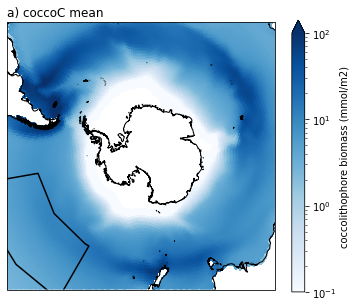

In [19]:
fig = plt.figure(figsize=(6,5))
contour_specs = {'levels': np.arange(-0.6,0.7,0.1)}
siz_lev = [0.5]
############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax.set_title('a) coccoC mean', loc='left')

lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_fosi_ann.coccoC.mean(dim='time'))

#pc = ax.pcolormesh(lon,lat,field,
#                     transform=ccrs.PlateCarree(),cmap='Blues',vmin=0,vmax=2)
pc=ax.pcolormesh(lon, lat, field, cmap='Blues',norm=colors.LogNorm(vmin=0.1, vmax=100),transform=ccrs.PlateCarree())

ax.coastlines('10m',linewidth=1)

lon_pts = [box1_lonmin,box1_lonmax,box1_lonmax,box1_lonmin,box1_lonmin]
lat_pts = [box1_latmax,box1_latmax,box1_latmin,box1_latmin,box1_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())



fig.colorbar(pc,extend='max', label='coccolithophore biomass (mmol/m2)');